In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Three_classes_16_inputs.xlsx to Three_classes_16_inputs.xlsx


In [3]:
file_name_1 = "Three_classes_16_inputs.xlsx"
df = pd.read_excel(file_name_1)


Training GBC...
Training RFC...
Training MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training SVC...
Accuracy of GBC on test set: 0.95
              precision    recall  f1-score   support

        ADRE       0.96      1.00      0.98        26
          HF       1.00      0.78      0.88         9
          KF       0.86      1.00      0.92         6

    accuracy                           0.95        41
   macro avg       0.94      0.93      0.93        41
weighted avg       0.96      0.95      0.95        41



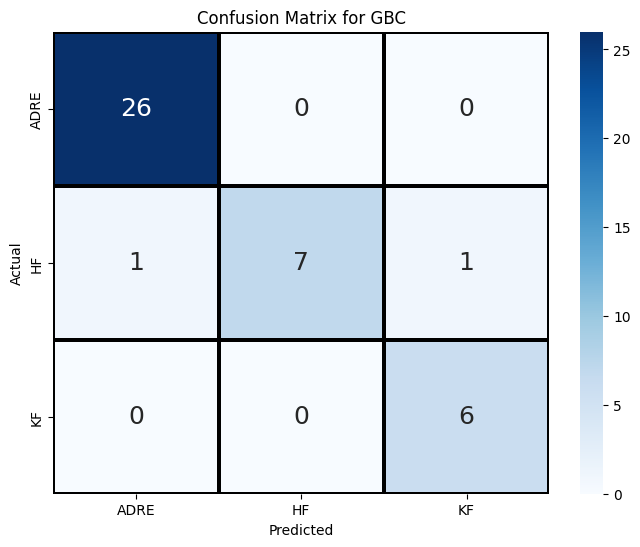

Accuracy of RFC on test set: 0.95
              precision    recall  f1-score   support

        ADRE       0.96      1.00      0.98        26
          HF       0.89      0.89      0.89         9
          KF       1.00      0.83      0.91         6

    accuracy                           0.95        41
   macro avg       0.95      0.91      0.93        41
weighted avg       0.95      0.95      0.95        41



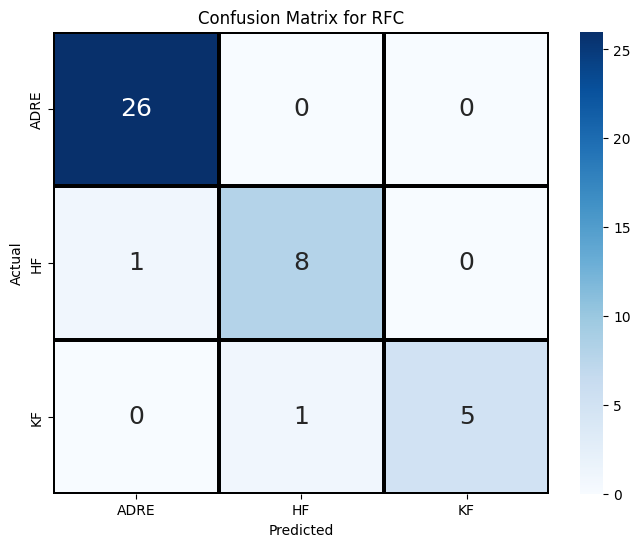

Accuracy of MLP on test set: 0.98
              precision    recall  f1-score   support

        ADRE       1.00      1.00      1.00        26
          HF       1.00      0.89      0.94         9
          KF       0.86      1.00      0.92         6

    accuracy                           0.98        41
   macro avg       0.95      0.96      0.95        41
weighted avg       0.98      0.98      0.98        41



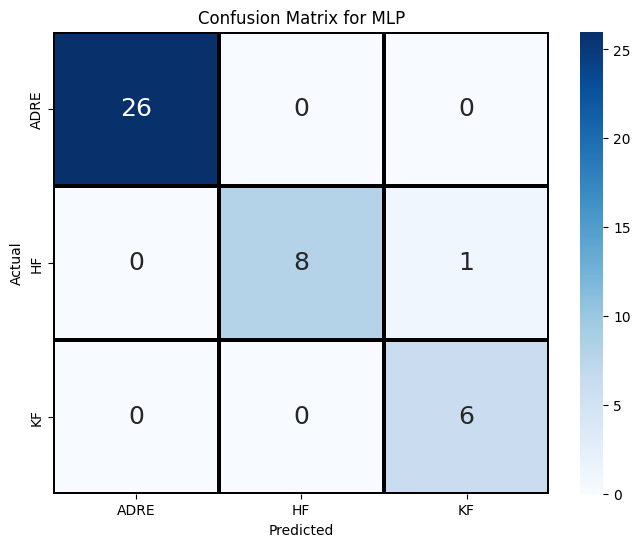

Accuracy of SVC on test set: 0.93
              precision    recall  f1-score   support

        ADRE       0.93      1.00      0.96        26
          HF       1.00      0.67      0.80         9
          KF       0.86      1.00      0.92         6

    accuracy                           0.93        41
   macro avg       0.93      0.89      0.90        41
weighted avg       0.93      0.93      0.92        41



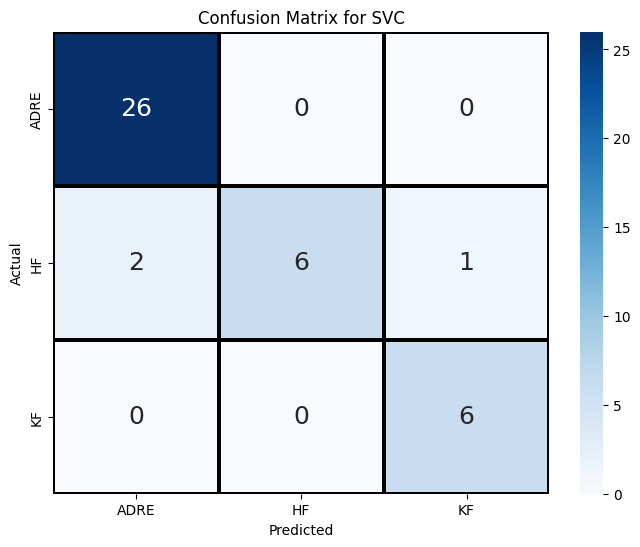

In [29]:
X = df.drop('Environment', axis=1)  # Assuming 'Environment' is the target column
y = df['Environment']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.transform(X_test)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    'GBC': GradientBoostingClassifier(),
    'RFC': RandomForestClassifier(),
    'MLP': MLPClassifier(max_iter=500),  # Increased `max_iter` for convergence
    'SVC': SVC(probability=True)  # `probability=True` to enable probability estimates
}
train_accuracies = {}
test_accuracies = {}

# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_prepared, y_train)
    train_accuracies[name] = model.score(X_train_prepared, y_train)
    test_accuracies[name] = model.score(X_test_prepared, y_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test_prepared)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name} on test set: {acc:.2f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
                     linewidths=1.5, linecolor='black',annot_kws={"size": 18})
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Unseen-data - Copy.xlsx to Unseen-data - Copy.xlsx


In [31]:
file_name_2 = "Unseen-data - Copy.xlsx"
blind_test_df = pd.read_excel(file_name_2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for GBC:
              precision    recall  f1-score   support

        ADRE       0.92      0.77      0.84        47
          HF       0.00      0.00      0.00        20
          KF       0.30      1.00      0.46        12

    accuracy                           0.61        79
   macro avg       0.41      0.59      0.43        79
weighted avg       0.59      0.61      0.57        79



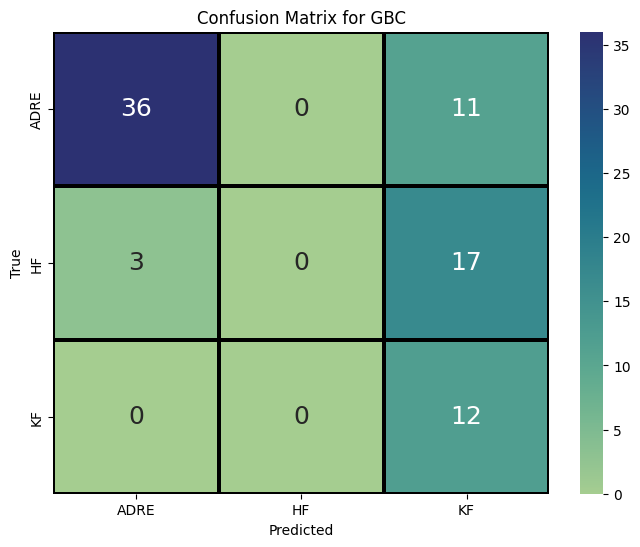

Classification Report for RFC:
              precision    recall  f1-score   support

        ADRE       0.91      0.83      0.87        47
          HF       0.73      0.55      0.63        20
          KF       0.38      0.67      0.48        12

    accuracy                           0.73        79
   macro avg       0.67      0.68      0.66        79
weighted avg       0.78      0.73      0.75        79



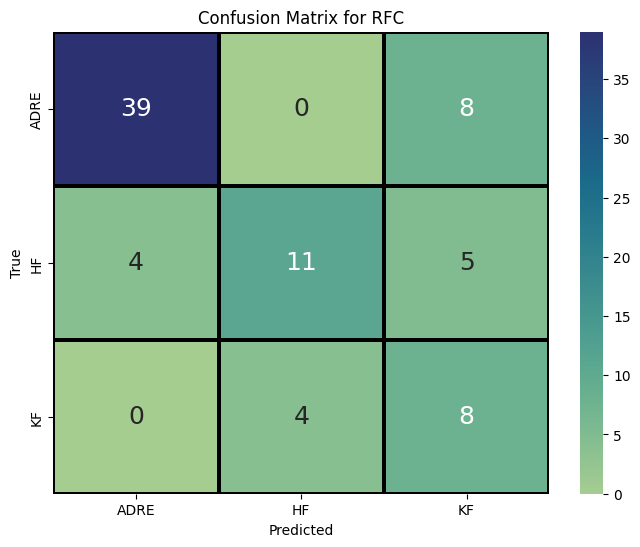

Classification Report for MLP:
              precision    recall  f1-score   support

        ADRE       1.00      0.13      0.23        47
          HF       0.00      0.00      0.00        20
          KF       0.17      1.00      0.29        12

    accuracy                           0.23        79
   macro avg       0.39      0.38      0.17        79
weighted avg       0.62      0.23      0.18        79



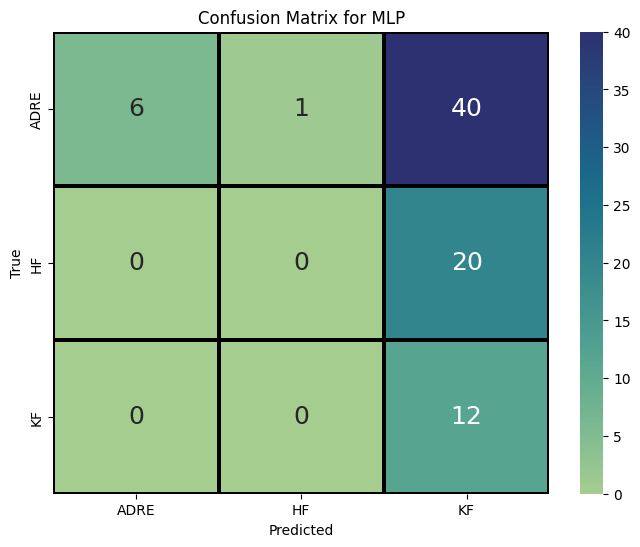

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for SVC:
              precision    recall  f1-score   support

        ADRE       1.00      0.11      0.19        47
          HF       0.00      0.00      0.00        20
          KF       0.16      1.00      0.28        12

    accuracy                           0.22        79
   macro avg       0.39      0.37      0.16        79
weighted avg       0.62      0.22      0.16        79



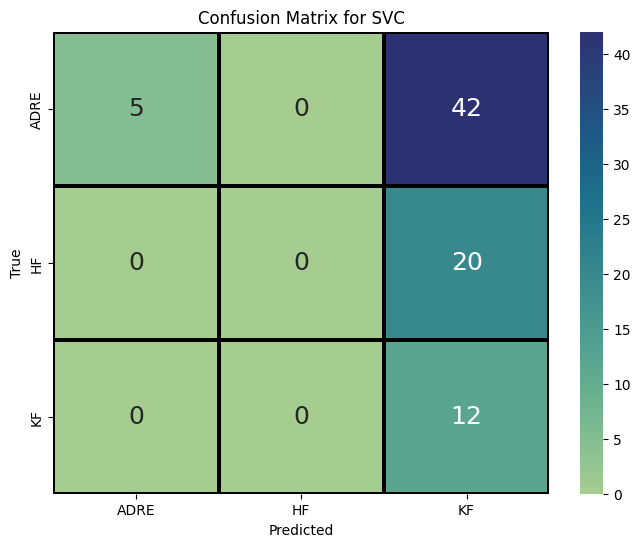

In [33]:
X_blind_test = blind_test_df.drop(['Environment'], axis=1)  # Assuming 'Environment' is the target column

# Scale the blind test data features using the same scaler used for the training data
X_blind_test_prepared = scaler.transform(X_blind_test)
blind_test_predictions = {}
for name, model in models.items():
    y_blind_test_pred = model.predict(X_blind_test_prepared)
    blind_test_predictions[name] = label_encoder.inverse_transform(y_blind_test_pred)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Environment' column in blind_test_df contains true labels
y_blind_test_true = blind_test_df['Environment']

# Encode the true labels
label_encoder = LabelEncoder()
y_blind_test_true_encoded = label_encoder.fit_transform(y_blind_test_true)  # Fit and transform

# Create dictionaries to store classification reports and confusion matrices
classification_reports = {}
confusion_matrices = {}

# Evaluate each model's predictions
for name in models.keys():
    # Encode the predictions
    y_blind_test_pred_encoded = label_encoder.transform(blind_test_predictions[name])

    # Classification report
    classification_reports[name] = classification_report(y_blind_test_true_encoded, y_blind_test_pred_encoded, target_names=label_encoder.classes_)
    print(f"Classification Report for {name}:")
    print(classification_reports[name])

    # Confusion matrix
    confusion_matrices[name] = confusion_matrix(y_blind_test_true_encoded, y_blind_test_pred_encoded)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrices[name], annot=True, fmt='d', cmap='crest', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
                     linewidths=1.5, linecolor='black', annot_kws={"size": 18})
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()